This notebook uses KMeans Algorithm to analyze bank customers to see if can further segmentize into various groups for better planning of marketing strategies on each.

The bank.csv file is used here, obtained online.

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/Colab Notebooks' # Please adjust the path accordingly
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks


In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
dat = pd.read_csv('bank.csv')
dat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


To find patterns to analyze customers information.

In [4]:
print(dat["age"].unique())

[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]


1. Try to find patterns from customers information.
- Age
- Job
- Balance

In [5]:
dat.shape

(11162, 17)

In [6]:
df = dat.sample(1000, random_state=0)[["age","balance"]]

In [7]:
df

,age,balance
9058,41,88
3279,56,1938
6502,30,245
9327,34,1396
9965,29,-13
...,...,...
1985,30,378
5392,40,4381
2301,49,6574
1106,41,3234


In [8]:

df.drop( df[df['age']>80].index, inplace=True)


In [9]:
df

,age,balance
9058,41,88
3279,56,1938
6502,30,245
9327,34,1396
9965,29,-13
...,...,...
1985,30,378
5392,40,4381
2301,49,6574
1106,41,3234


Plot the graph based on the 2 axis

Text(0, 0.5, 'balance')

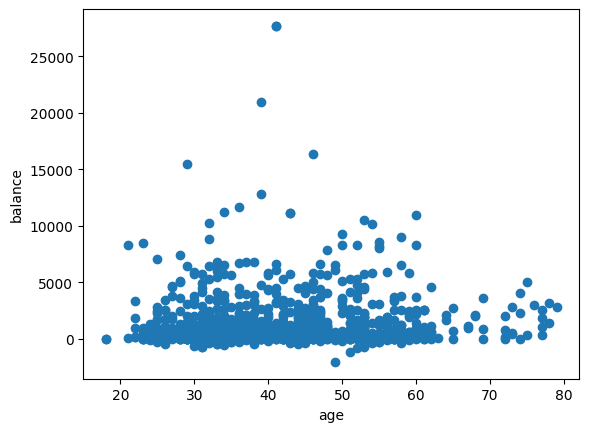

In [10]:
plt.scatter(df.age, df.balance)
plt.xlabel('age')
plt.ylabel("balance")

Text(0, 0.5, 'balance_scaled')

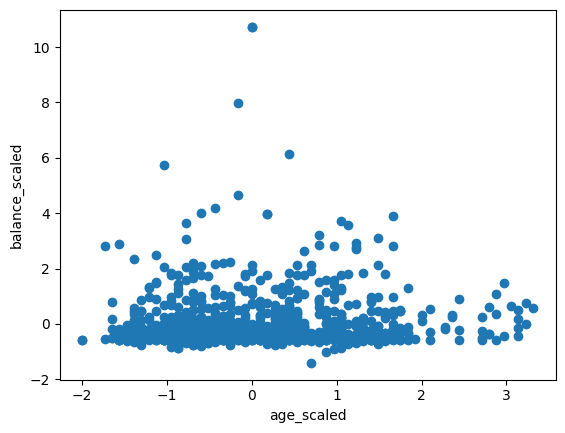

In [11]:
#scaled the date,scaling change the scale

X= df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.xlabel("age_scaled")
plt.ylabel("balance_scaled")

Build and evaluate K_means model

In [12]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)


In [13]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=20, random_state=1)

In [14]:
kmeans.cluster_centers_

array([[ 0.06788845,  2.58871091],
       [ 1.17141268, -0.127457  ],
       [-0.61407397, -0.27386883]])

In [15]:
y_pred = kmeans.predict(X_scaled)
y_pred

array([2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0,
       1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2,

plot visuals on the clusters and their correspondent centroids

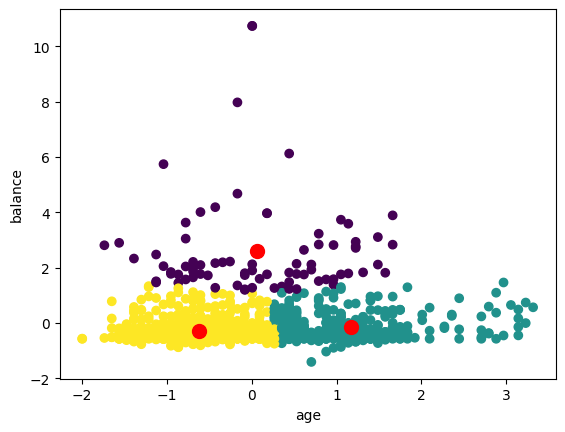

In [16]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c='red' )
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

In [17]:
#evaluate classifications using sum of squared erros(SSE)
kmeans.inertia_

750.2557553693969

Improve the kmeans model by creating a loop to try clusters values

[1984.0000000000027]
[1984.0000000000027, 1260.4448130302176]
[1984.0000000000027, 1260.4448130302176, 750.2557553693969]
[1984.0000000000027, 1260.4448130302176, 750.2557553693969, 569.6363922460754]
[1984.0000000000027, 1260.4448130302176, 750.2557553693969, 569.6363922460754, 437.98588580890635]
[1984.0000000000027, 1260.4448130302176, 750.2557553693969, 569.6363922460754, 437.98588580890635, 367.190697211862]
[1984.0000000000027, 1260.4448130302176, 750.2557553693969, 569.6363922460754, 437.98588580890635, 367.190697211862, 310.6635855252763]
[1984.0000000000027, 1260.4448130302176, 750.2557553693969, 569.6363922460754, 437.98588580890635, 367.190697211862, 310.6635855252763, 258.3000543553628]
[1984.0000000000027, 1260.4448130302176, 750.2557553693969, 569.6363922460754, 437.98588580890635, 367.190697211862, 310.6635855252763, 258.3000543553628, 225.72244500366344]
[1984.0000000000027, 1260.4448130302176, 750.2557553693969, 569.6363922460754, 437.98588580890635, 367.190697211862, 

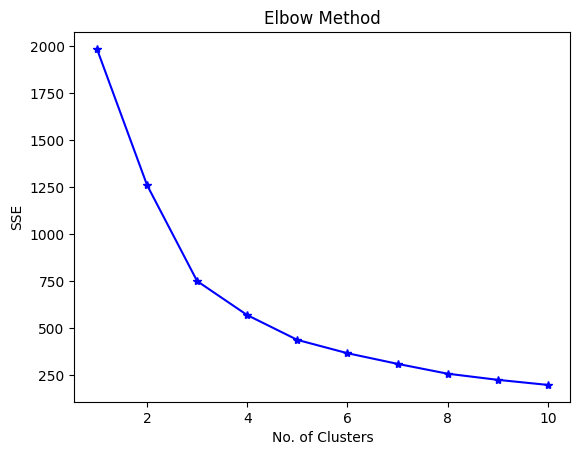

In [18]:
sse=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
  kmeans.fit(X_scaled)
  sse.append(kmeans.inertia_)
  print(sse)


plt.plot(range(1,11),sse,'b-*')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('SSE')
plt.show()

Build and train the Model using K=5 and K=6

In [19]:
# K=5 or K=6
kmeans = KMeans(n_clusters=5, n_init=20, random_state=1)
kmeans.fit(X_scaled)
kmeans.inertia_

437.98588580890635

In [20]:
kmeans = KMeans(n_clusters=6, n_init=20, random_state=1)
kmeans.fit(X_scaled)
kmeans.inertia_

367.190697211862

In [21]:
#Select K=6 for prediction

y_pred = kmeans.fit_predict(X_scaled)

In [22]:
y_pred

array([1, 3, 2, 2, 2, 2, 3, 1, 3, 2, 3, 2, 3, 3, 0, 3, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 3, 2, 2, 1, 1, 2, 2, 4,
       3, 0, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 3, 2, 0, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 0, 4, 2, 2, 2, 2, 2, 2, 3, 0, 2, 1, 2, 1, 3, 2, 2, 2,
       2, 2, 0, 4, 2, 3, 3, 1, 0, 0, 3, 1, 3, 2, 3, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 0, 2, 2, 3, 1, 2, 2,
       3, 1, 3, 2, 1, 2, 1, 2, 2, 3, 3, 1, 3, 0, 2, 3, 2, 2, 3, 3, 1, 1,
       2, 2, 2, 4, 4, 1, 2, 3, 2, 2, 2, 3, 1, 2, 1, 1, 0, 0, 2, 3, 2, 0,
       1, 3, 2, 2, 0, 4, 2, 0, 2, 1, 1, 1, 3, 1, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 0, 0, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2,
       1, 1, 2, 3, 2, 2, 0, 2, 2, 2, 1, 2, 2, 3, 2, 1, 3, 2, 0, 2, 2, 3,
       1, 2, 3, 3, 2, 3, 0, 1, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 1, 5, 2, 1,
       1, 3, 2, 3, 2, 2, 1, 2, 4, 2, 1, 3, 3, 1, 2, 2, 1, 1, 1, 2, 1, 0,
       2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2,

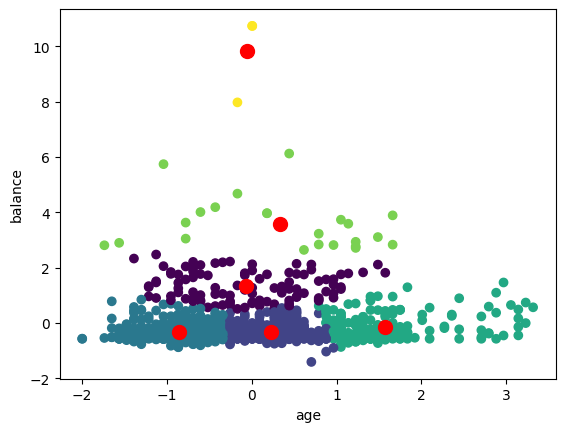

In [23]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

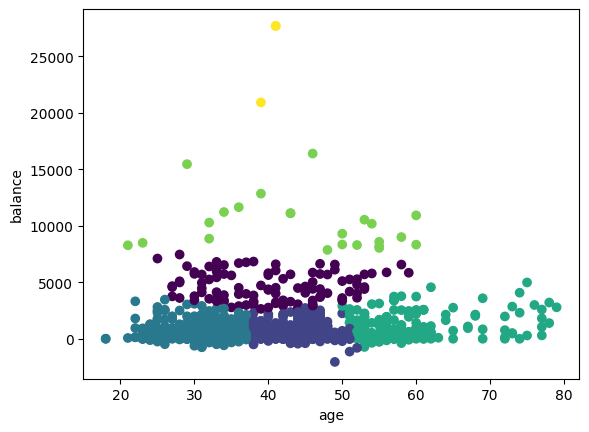

In [24]:
# Visualise the Clusters with the original value ranges
plt.scatter(X[:,0], X[:,1], c=y_pred)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

We can Interpret the Model as follows:

We can group the customers into 5 clusters.
1. C1: Super High Balance (Wealthy)
2. C2: Comfortable (age is wide range)
3. C3: young age, low balance
4. C4: middle age, low balance
5. C5: senior age, low balance